# พลอตข้อมูลความชื้นจำเพาะในแต่ละระดับความกดอากาศของพายุนาลแก ตุลาคม 2554
*  ปี 2554 เป็นปีที่ประเทศไทยได้รับผลกระทบจากมหาอุทกภัย เนื่องจากเป็นปีที่มีปริมาณน้ำที่มากกว่าปีปรกติ โดยที่มีจำนวนพายุโซนร้อนเคลื่อนตัวเข้าสู่พื้นที่อินโดจีนที่รวมทั้้งประเทศไทยเป็นจำนวนหลายลูกมากกว่าปีปรกติ นอกจากนั้นยังมีอิทธิพลของร่องมรสุมที่พาดผ่านปรากฏในหลายช่วงเวลา ดังนั้นปี 2554 จึงเป็นปีที่เหมาะแก่การนำมาศึกษาทางด้านบรรยากาศวิทยา ให้นิสิตอ่านบันทึกเหตุการณ์มหาอุทกภัยปี 2554 http://tiwrmdev.hii.or.th/current/menu.html
* ข้อมูล ERA5 daily จาก https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-pressure-levels?tab=overview
* อ่านเอกสารตัวแปรจาก https://confluence.ecmwf.int/display/CKB/ERA5%3A+data+documentation
* ERA5 มีความละเอียด 0.25 deg นั่นคือ ราวๆ 25 กิโลเมตรที่เส้นศูนย์สูตร
* ความชื้นจำเพาะ (specific humidity : qs) หมายถึง อัตราส่วนระหว่างมวลของไอน้ำในอากาศชื้นต่อมวลอากาศทั้งหมด (kg. kg-1) อ่านต่อ https://pirun.ku.ac.th/~fengvwv/chotiga/BasicMeteorology.html


### สิ่งที่นิสิตจะได้เรียนรู้
* อธิบายข้อมูล ตัวแปร ที่ได้จาก ERA5 แบบรายชั่วโมงแต่เลือกเฉพาะ 00 UTC สาธิตการใช้ข้อมูล โดยเลือกวันที่ 2-5 ตุลาคม 2011 เพื่อดูพายุนาลแก
* พลอตแผนที่ความชื้นในแต่ละระดับ ในที่นี้จะใช้ specific humidity เพื่อวิเคราะห์ความผันแปรของความชื้นในแต่ละระดับความกดอากาศ
* สกัดข้อมูล specific humidity ตามพิกัดภูมิศาสตร์และแต่ละระดับความกดอากาศที่ต้องการ เพื่อนำออกไปวิเคราะห์ต่อในโปรแกรมเช่น excel หรือ R

##### ข้อมูล ERA5 เป็นข้อมูลทั้งโลก ดังนั้นการประมวลผลจะนาน หากนิสิตต้องการประมวลผลเฉพาะพื้นที่ที่นิสิตสนใจ เช่นอินโดจีนและบริเวณโดยรอบ นิสิตสามารถเลือกข้อมูลด้วยการ slice ซึ่งเป็นหลักการเลือกข้อมูลใน numpy แต่ในที่นี้ข้อมูลภูมิอากาศจะมีเรื่องมิติช่วงเวลามาด้วย ทำให้การใช้งาน numpy ไม่สะดวก ดังนั้นจึงใช้ไลบราลี่ xarray ที่สามารถ slice ข้อมูลที่มีค่า coordinate แบบ time ได้ด้วย นิสิตสามารถเรียนรู้ได้จากวีดีโอต่อไปนี้ https://www.youtube.com/watch?v=z5AyfTsJYKo&list=PLguMJ8gVmqXg5tS1MmNOfj_U06GMxKbZh&index=4 ซึ่งชาแนลนี้มีโค้ด snippet ที่มีตัวอย่างการใช้งานจริงหลายกรณีศึกษา นิสิตสามารถเรียนรู้และนำมาดัดแปลงได้


### ยูทูปชาแนลและแหล่งเรียนรู้ออนไลน์ที่นิสิตควรศึกษาทางด้านบรรยากาศศาสตร์ ได้แก่
    * Dr.kevin Perry จากมหาวิทยาลัย Utah สอนเรื่องบรรยากาศศาสตร์ https://www.youtube.com/channel/UCktw_bKshmipG9QH_pgMkLw/videos
    * Prof.Dr.Ronald Smith จากมหาวิทยาลัยYale เรื่องThe Atmosphere, the Ocean, and Environmental Change https://oyc.yale.edu/geology-and-geophysics/gg-140
    *หนังสือฟรี อุตุนิยมวิทยาภาคปฏิบัติ สอนการคำนวณของ Prof.Roland Stull https://www.eoas.ubc.ca/books/Practical_Meteorology/

## 1.ทำความเข้าใจกับข้อมูล ERA5 ที่ได้ดาวน์โหลดมา

In [1]:
#นำเข้าไลบราลี่
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
#อ่านข้อมูล
df = xr.open_dataset('era5_daily_2_5oct_2011_globe.nc')
print(df)

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721, level: 8, time: 4)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * level      (level) int32 200 250 300 500 700 850 925 1000
  * time       (time) datetime64[ns] 2011-10-02 2011-10-03 2011-10-04 2011-10-05
Data variables:
    d          (time, level, latitude, longitude) float32 ...
    z          (time, level, latitude, longitude) float32 ...
    r          (time, level, latitude, longitude) float32 ...
    q          (time, level, latitude, longitude) float32 ...
    t          (time, level, latitude, longitude) float32 ...
    u          (time, level, latitude, longitude) float32 ...
    v          (time, level, latitude, longitude) float32 ...
    vo         (time, level, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-04-16 09:15:12 GMT by grib_t

In [3]:
df

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721, level: 8, time: 4)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * level      (level) int32 200 250 300 500 700 850 925 1000
  * time       (time) datetime64[ns] 2011-10-02 2011-10-03 2011-10-04 2011-10-05
Data variables:
    d          (time, level, latitude, longitude) float32 ...
    z          (time, level, latitude, longitude) float32 ...
    r          (time, level, latitude, longitude) float32 ...
    q          (time, level, latitude, longitude) float32 ...
    t          (time, level, latitude, longitude) float32 ...
    u          (time, level, latitude, longitude) float32 ...
    v          (time, level, latitude, longitude) float32 ...
    vo         (time, level, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-04-16 09:15:12 GMT by grib_to_netcdf-2.24.3: /opt/ecmw...

* สังเกตุค่า Dimensions, Coordinates, Data Variables, Attributes ที่เป็นโครงสร้างการจัดเก็บข้อมูลแบบ netCDF หรือ nc ที่อ่านได้จาก XArray
* ตอนนี้ต้องการใช้ตัวแปร  q นั่นคือ specific humidity มีหน่วยเป็น kg kg**-1 อ่านเอกสารตัวแปรจาก https://confluence.ecmwf.int/display/CKB/ERA5%3A+data+documentation

In [3]:
lon_ = df.longitude
lat_ = df.latitude
time_  = df.time
humd_  = df.q #specific humidity
lev_ = df.level
print(humd_.shape)

(4, 8, 721, 1440)


In [4]:
print(humd_)

<xarray.DataArray 'q' (time: 4, level: 8, latitude: 721, longitude: 1440)>
[33223680 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * level      (level) int32 200 250 300 500 700 850 925 1000
  * time       (time) datetime64[ns] 2011-10-02 2011-10-03 2011-10-04 2011-10-05
Attributes:
    units:          kg kg**-1
    long_name:      Specific humidity
    standard_name:  specific_humidity


In [5]:
print(humd_[0].values)

[[[4.44520265e-06 4.44520265e-06 4.44520265e-06 ... 4.44520265e-06
   4.44520265e-06 4.44520265e-06]
  [4.44520265e-06 4.44520265e-06 4.44520265e-06 ... 4.44520265e-06
   4.44520265e-06 4.44520265e-06]
  [4.44520265e-06 4.44520265e-06 4.44520265e-06 ... 4.44520265e-06
   4.44520265e-06 4.44520265e-06]
  ...
  [2.20723450e-06 2.20723450e-06 2.20723450e-06 ... 2.20723450e-06
   2.20723450e-06 2.20723450e-06]
  [1.83470547e-06 1.83470547e-06 1.83470547e-06 ... 1.83470547e-06
   1.83470547e-06 1.83470547e-06]
  [1.83470547e-06 1.83470547e-06 1.83470547e-06 ... 1.83470547e-06
   1.83470547e-06 1.83470547e-06]]

 [[1.71251595e-05 1.71251595e-05 1.71251595e-05 ... 1.71251595e-05
   1.71251595e-05 1.71251595e-05]
  [1.67526305e-05 1.67526305e-05 1.67526305e-05 ... 1.63791701e-05
   1.63791701e-05 1.67526305e-05]
  [1.60066411e-05 1.60066411e-05 1.60066411e-05 ... 1.60066411e-05
   1.60066411e-05 1.60066411e-05]
  ...
  [3.32575291e-06 3.32575291e-06 3.32575291e-06 ... 3.69921327e-06
   3.69921

In [6]:
print(humd_[-1].values)

[[[3.69921327e-06 3.69921327e-06 3.69921327e-06 ... 3.69921327e-06
   3.69921327e-06 3.69921327e-06]
  [3.69921327e-06 3.69921327e-06 3.69921327e-06 ... 3.69921327e-06
   3.69921327e-06 3.69921327e-06]
  [3.69921327e-06 3.69921327e-06 3.69921327e-06 ... 3.69921327e-06
   3.69921327e-06 3.69921327e-06]
  ...
  [3.69921327e-06 3.69921327e-06 3.69921327e-06 ... 3.69921327e-06
   3.69921327e-06 3.69921327e-06]
  [3.69921327e-06 3.69921327e-06 3.69921327e-06 ... 3.69921327e-06
   3.69921327e-06 3.69921327e-06]
  [3.69921327e-06 3.69921327e-06 3.69921327e-06 ... 3.69921327e-06
   3.69921327e-06 3.69921327e-06]]

 [[9.66619700e-06 9.66619700e-06 9.66619700e-06 ... 9.66619700e-06
   9.66619700e-06 9.66619700e-06]
  [1.00396574e-05 1.00396574e-05 1.00396574e-05 ... 1.00396574e-05
   1.00396574e-05 1.00396574e-05]
  [1.04121864e-05 1.04121864e-05 1.04121864e-05 ... 1.04121864e-05
   1.04121864e-05 1.04121864e-05]
  ...
  [8.17421824e-06 8.17421824e-06 8.17421824e-06 ... 8.17421824e-06
   8.17421

(4, 8, 721, 1440)


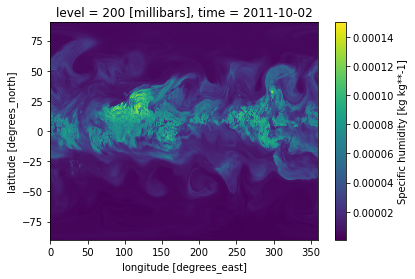

In [7]:
# พลอตแผนที่แบบรวดเร็ว
print(humd_.shape)
humd_[0,0,:,:].plot() #1000 hPa วันที่ 2 ตุลาคม

## 2.พลอตแผนที่ความชื้นจำเพาะด้วยการเลือกช่วงเวลา

In [8]:
## 2.พลอตแผนที่ความชื้นจำเพาะด้วยการเลือกช่วงเวลา
humid=humd_.sel(time='2011-10-02',level=850) # ความชื้นจำเพาะวันที่ 2 ตุลาคม

In [9]:
humid

<xarray.DataArray 'q' (latitude: 721, longitude: 1440)>
[1038240 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
    level      int32 850
    time       datetime64[ns] 2011-10-02
Attributes:
    units:          kg kg**-1
    long_name:      Specific humidity
    standard_name:  specific_humidity

In [10]:
humid.shape

(721, 1440)

### พลอตแผนที่ทั้งโลกด้วยข้อมูลความชื้นจำเพาะที่ระดับ 850 hPa

C:\Users\Admin\anaconda3\envs\metpy\lib\site-packages\cartopy\crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
C:\Users\Admin\anaconda3\envs\metpy\lib\site-packages\cartopy\crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
C:\Users\Admin\anaconda3\envs\metpy\lib\site-packages\cartopy\crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
C:\Users\Admin\anaconda3\envs\metpy\lib\site-packages\cartopy\cr

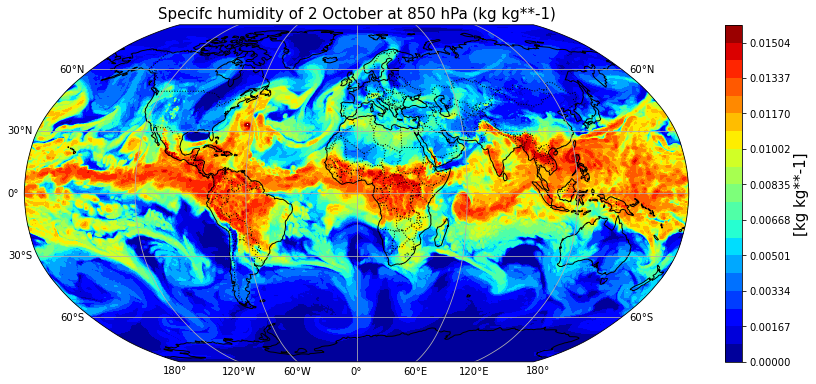

In [11]:
### พลอตแผนที่ทั้งโลกด้วยข้อมูลความชื้นจำเพาะที่ระดับ 850 hPa
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import cartopy.feature as cfeat

plt.figure(figsize=(13,6.2))
uw_cyc, lon_cyc = add_cyclic_point(humid, coord=lon_) #Changing the longitude from 0º – 360º to -180 – 180 จาก https://geoclimatologyblog.wordpress.com/page/2/


ax = plt.subplot(111, projection=ccrs.Robinson())
max_ = np.max(uw_cyc)
#max_ = 0.01
min_ = np.min(uw_cyc)
vstep = max_/20
#vstep = 0.0001
levels = np.arange(min_, max_, vstep)
humid_ = ax.contourf(lon_cyc,\
                                 lat_,\
                                 uw_cyc,\
                                 levels,\
                                 transform=ccrs.PlateCarree(),\
                                 cmap='jet')


ax.coastlines(resolution='110m', color='black', linewidth=1) #เพิ่มแนวชายฝั่งจาก pyplot
ax.add_feature(cfeat.BORDERS, linestyle=':') #เพิ่มขอบเขตประเทศจาก cartopy

#เซตค่าชื่อกริด การแสดงกริดเส้นโครง
gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False

#พลอต color bar
# คำนวณมิติข้อมูล (height_of_image / width_of_image)
im_ratio = uw_cyc.shape[0]/uw_cyc.shape[1]
cbar = plt.colorbar(humid_,fraction=0.047*im_ratio)
cbar.set_label('[kg kg**-1]', fontsize=15)


plt.title('Specifc humidity of 2 October at 850 hPa (kg kg**-1)', fontsize=15)
plt.show()

## ใช้เวลานานเลยในการพลอตภาพนี้

### พลอตแผนที่เฉพาะพื้นที่อินโดจีนและโดยรอบ ระดับความกดบรรยากาศ 850 hPa 

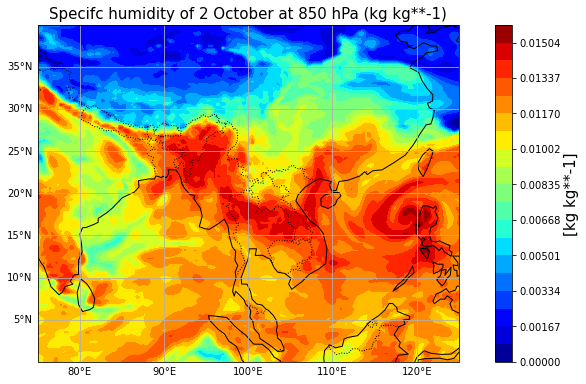

In [12]:
### พลอตแผนที่อินโดจีนและพื้นที่โดยรอบด้วยข้อมูลความชื้นจำเพาะที่ระดับ 850 hPa
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import cartopy.feature as cfeat

plt.figure(figsize=(13,6.2))
uw_cyc, lon_cyc = add_cyclic_point(humid, coord=lon_) #Changing the longitude from 0º – 360º to -180 – 180 จาก https://geoclimatologyblog.wordpress.com/page/2/

# กำหนดค่าเส้นโครงแผนที่
mapcrs = ccrs.PlateCarree(central_longitude=100)

# กำหนดค่าเส้นโครงแผนที่ของข้อมูล
datacrs = ccrs.PlateCarree()

ax = plt.subplot(111, projection=mapcrs)
ax.set_extent([75, 125, 0, 40], ccrs.PlateCarree()) #กำหนดขอบเขตแผนที่
max_ = np.max(uw_cyc)
#max_ = 0.01
min_ = np.min(uw_cyc)
vstep = max_/20
#vstep = 0.0001
levels = np.arange(min_, max_, vstep)
humid_ = ax.contourf(lon_cyc,\
                                 lat_,\
                                 uw_cyc,\
                                 levels,\
                                 transform=ccrs.PlateCarree(),\
                                 cmap='jet')


ax.coastlines(resolution='110m', color='black', linewidth=1) #เพิ่มแนวชายฝั่งจาก pyplot
ax.add_feature(cfeat.BORDERS, linestyle=':') #เพิ่มขอบเขตประเทศจาก cartopy

#เซตค่าชื่อกริด การแสดงกริดเส้นโครง
gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False

#พลอต color bar
# คำนวณมิติข้อมูล (height_of_image / width_of_image)
im_ratio = uw_cyc.shape[0]/uw_cyc.shape[1]
cbar = plt.colorbar(humid_,fraction=0.047*im_ratio)
cbar.set_label('[kg kg**-1]', fontsize=15)


plt.title('Specifc humidity of 2 October at 850 hPa (kg kg**-1)', fontsize=15)
plt.show()

## ใช้เวลานานเลยในการพลอตภาพนี้

In [13]:
print(uw_cyc.shape)
(lon_cyc .shape)

(721, 1441)


(1441,)

#### สังเกตุถึงลักษณะการหมุนวนของความชื้นจำเพาะที่หมุนวนเข้าศูนย์กลางความกดอากาศต่ำของพายุนาลแก ที่อยู่ในทะเลจีนใต้ กำลังเคลื่อนตัวเข้าสู่ชายฝั่งเวียดนามต่อไป ในขณะเดียวกันพบว่าบริเวณภาคอีสานและภาคเหนือของประเทศไทยมีความชื้นจำเพาะที่สูงอยู่แล้ว เนื่องจากมีพายุเนสาดที่เข้ามาสลายตัวก่อนหน้าในตอนปลายของเดือนตุลาคมแล้ว อ่านบันทึกเหตุการณ์มหาอุทกภัยปี 2554 http://tiwrmdev.hii.or.th/current/menu.html 

#### งานมอบหมายนิสิต 
* ให้นิสิตทำการพลอตดูความชื้นจำเพาะในแต่ละระดับ เพื่อเปรียบเทียบกัน 1000hPa, 925hPa, 850hPa, 500hPa, 200hPa แล้วสังเกตุถึงค่าความผันแปรของความชื้นจำเพาะในพื้นที่ที่สนใจ เช่นในแต่ละประเทศ พร้อมบรรยายออกมาเป็นข้อความ

## 3.สกัดค่าความชื้นจำเพาะในแต่ละระดับความกดอากาศจากค่าพิกัดที่สนใจ

### สกัดค่าพิกัดจากค่าพิกัดภูมิศาสตร์


In [14]:
# กำหนดค่าเส้นโครงแผนที่ของข้อมูล 
datacrs = ccrs.PlateCarree()

# แปลงค่าจุดที่ต้องการสกัดค่าตัวแปรในแต่ละระดับเป็นแบบเส้นโครงแผนที่ Plate Carree for lat/lon grid เสมอ
x, y = datacrs.transform_point(100, 15.0, src_crs=ccrs.PlateCarree())

# สกัดค่าอุณหภูมิในแต่ละระดับความกดอากาศ
humd_ext=humd_.sel(longitude=x, latitude=y) 
humd_ext[0,:]

# นิสิตลองเปลี่ยนค่าพิกัดจาก ไปเป็น 100, 20 หรือพิกัดอำเภอบ้านของนิสิต

<xarray.DataArray 'q' (level: 8)>
array([9.917468e-05, 3.438313e-04, 8.059181e-04, 4.233718e-03, 1.044448e-02,
       1.160436e-02, 1.323752e-02, 1.688275e-02], dtype=float32)
Coordinates:
    longitude  float32 100.0
    latitude   float32 15.0
  * level      (level) int32 200 250 300 500 700 850 925 1000
    time       datetime64[ns] 2011-10-02
Attributes:
    units:          kg kg**-1
    long_name:      Specific humidity
    standard_name:  specific_humidity

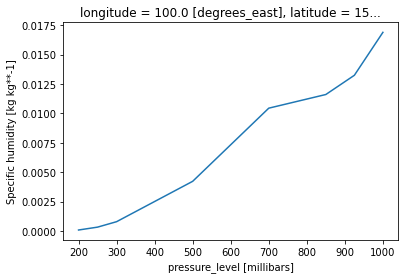

In [15]:
# พลอตกราฟ
humd_ext[0,:].plot()  #0 คือวันที่ 2 ตุลาคม และ : คือให้พลอตทุกระดับความกดอากาศ

#### สังเกตุว่าความชื้นจะกระจุกตัวอยู่ใกล้ๆ กับชั้นบรรยากาศเบื้องล่าง พอขึ้นไปในระดับที่สูงขึ้น ปริมาณความชื้นจะลดลงอย่างรวดเร็ว

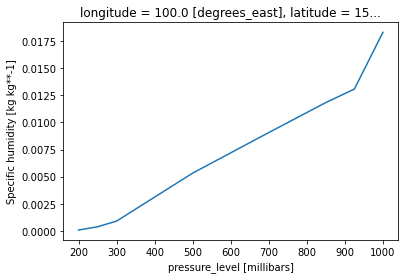

In [16]:
# พลอตกราฟ
humd_ext[1,:].plot()  #1 คือวันที่ 3 ตุลาคม และ : คือให้พลอตทุกระดับความกดอากาศ

In [17]:
### ส่งออกข้อมูลความชื้นจำเพาะวันที่ 2 ตุลาคมออกไปเป็น csv
humd_levs=humd_ext[0,:]
humd_levs.shape

(8,)

In [18]:
# หาค่าอินเด็กซ์
ind            = [ 200,  250,  300,  500,  700,  850,  925, 1000]
# สร้างไพธอนดิกชันนารี
our_dictionary = {'ind' : ind, 'humd': np.round(humd_levs,2)}
df_out         = pd.DataFrame(our_dictionary, columns=['ind', 'humd'])
# ส่งออกไปเป็นไฟล์  CSV
export_csv     = df_out.to_csv('specificHumidity.csv', index=None, header=True)

# ให้นิสิตกลับไปดูโฟลเดอร์ที่เก็บไฟล์ jupyter ที่กำลังทำงานอยู่นี้ ของผมอยู่ที่ C:\Users\Admin\jupyter_metpy\metpy_youtube

## อ่านข้อมูล CSV เข้ามาอีกครั้ง

In [19]:
# เปิด CSV file
df_csv = pd.read_csv('specificHumidity.csv')

In [20]:
print(df_csv)

    ind  humd
0   200  0.00
1   250  0.00
2   300  0.00
3   500  0.00
4   700  0.01
5   850  0.01
6   925  0.01
7  1000  0.02


### งานมอบหมายให้นิสิตทำการทดลอง
1.ให้นิสิตทำการสกัดค่าความชื้นจำเพาะของวันที่ 2 ตุลาคม ในจังหวัดต่อไปนี้ พิษณุโลก เชียงใหม่ กรุงเทพ ขอนแก่น สงขลา โดยใช้ค่าพิกัดภูมิศาสตร์ แล้วทำการส่งออกไปเป็นนามสกุล CSV พร้อมกับพลอตกราฟเปรียบเทียบอภิปรายความชื้นจำเพาะของพื้นที่ดังกล่าว
2.ให้นิสิตสกัดค่าความชื้นจำเพาะของวันที่2-5 ตุลาคม 2011 ด้วยการใช้พิกัดจากข้อแรกหนึ่งจังหวัดที่นิสิตสนใจ แล้วสกัดค่าความชื้นจำเพาะในแต่ละระดับความกดอากาศ ส่งออกเป็น CSV แล้วพลอตกราฟในเอกเซล พร้อมอภิปรายเปรียบเทียบผลลัพธ์